# CH11 資料視覺化與圖表繪製 - Word Cloud

資料來源：{cite}`資訊社會必修的12堂Python通識課_博碩`

## Example 1

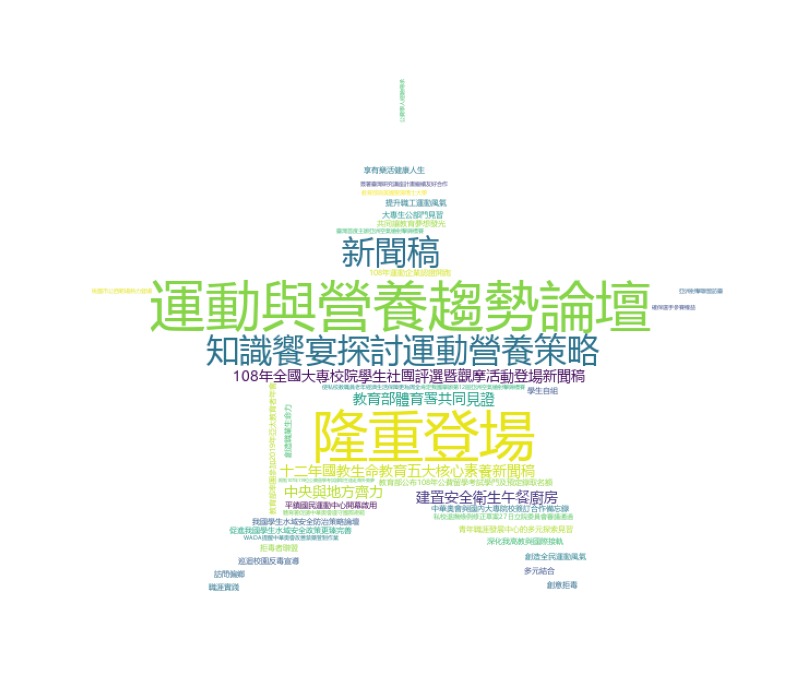

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
import numpy as np

f = open('CH11_資料視覺化與圖表繪製\\eduheadlines.txt', 'r', encoding='utf-8').read()
mask = np.array(Image.open('CH11_資料視覺化與圖表繪製\\star.jpg'))
wordcloud = WordCloud(
    background_color="white",
    width=1000,
    height=860,
    margin=2,
    # font_path="simhei.ttf",
    font_path="msyh.ttc",
    mask=mask).generate(f)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Example 2

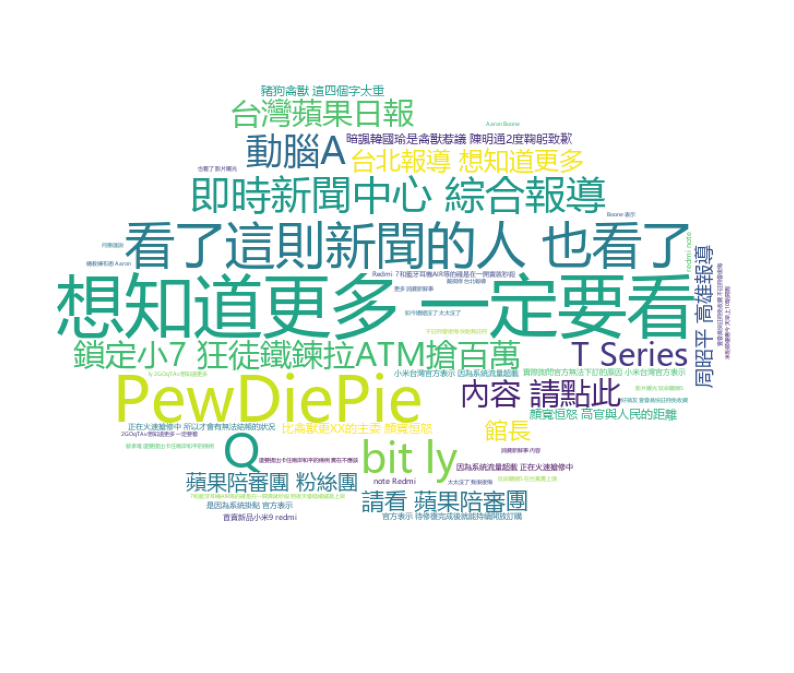

In [13]:
%matplotlib inline
import sqlite3
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
import numpy as np

dbfile = "CH11_資料視覺化與圖表繪製\\applenews.db"
conn = sqlite3.connect(dbfile)

sql_str = "select * from news;"
rows = conn.execute(sql_str)
all_news = ""
for row in rows:
    all_news += row[3]

mask = np.array(Image.open('CH11_資料視覺化與圖表繪製\\cloud.jpg'))
wordcloud = WordCloud(
    background_color="white",
    width=1000,
    height=860,
    margin=2,
    # font_path="simhei.ttf",
    font_path="msyh.ttc",
    mask=mask).generate(all_news)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Example 3

['\ufeff', '」', '陳明通', '陳', '明通', '最', 'oh', '只', '卻', '裡', '次', '想', '再', '\\n', '\\r\\n', ',', '?', '、', '。', '“', '”', '《', '》', '！', '，', '：', '；', '？', '人民', '末##末', '啊', '阿', '哎', '哎呀', '哎喲', '唉', '我', '我們', '按', '按照', '依照', '吧', '吧噠', '把', '罷了', '被', '本', '本著', '比', '比方', '比如', '鄙人', '彼', '彼此', '邊', '別', '別的', '別說', '並', '並且', '不比', '不成', '不單', '不但', '不獨', '不管', '不光', '不過', '不僅', '不拘', '不論', '不怕', '不然', '不如', '不特', '不惟', '不問', '不只', '朝', '朝著', '趁', '趁著', '乘', '沖', '除', '除此之外', '除非', '除了', '此', '此間', '此外', '從', '從而', '打', '待', '但', '但是', '當', '當著', '到', '得', '的', '的話', '等', '等等', '地', '第', '叮咚', '對', '對於', '多', '多少', '而', '而況', '而且', '而是', '而外', '而言', '而已', '爾後', '反過來', '反過來說', '反之', '非但', '非徒', '否則', '嘎', '嘎登', '該', '趕', '個', '各', '各個', '各位', '各種', '各自', '給', '根據', '跟', '故', '故此', '固然', '關於', '管', '歸', '果然', '果真', '過', '哈', '哈哈', '呵', '和', '何', '何處', '何況', '何時', '嘿', '哼', '哼唷', '呼哧', '乎', '嘩', '還是', '還有', '換句話說', '換言之', '或', '或是', '或者', '極了', '及', '及其', '及至', '即', '即便', '即或', '即

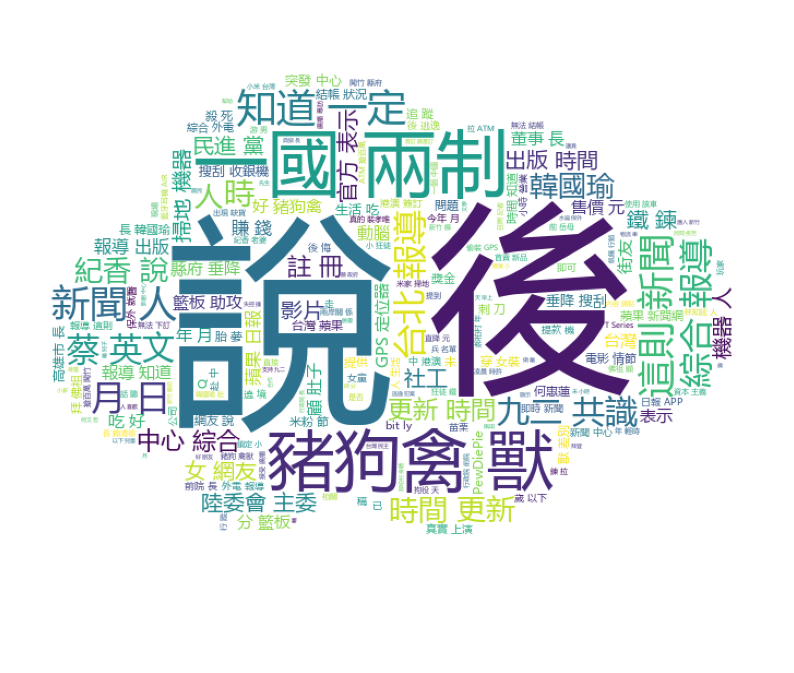

In [15]:
# stopWords.txt is from https://github.com/tomlinNTUB/Python-in-5-days
%matplotlib inline
import sqlite3
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
import numpy as np
import jieba
from collections import Counter

dbfile = "CH11_資料視覺化與圖表繪製\\applenews.db"
conn = sqlite3.connect(dbfile)

sql_str = "select * from news;"
rows = conn.execute(sql_str)
all_news = ""
for row in rows:
    all_news += row[3]

stopwords = list()
# with open('CH11_資料視覺化與圖表繪製\\stopWords.txt', 'rt', encoding='utf-8') as fp:
with open('CH11_資料視覺化與圖表繪製\\stopWord_cloudmod.txt', 'rt',
          encoding='utf-8') as fp:
    stopwords = [word.strip() for word in fp.readlines()]

# print(stopwords)

keyterms = [
    keyterm for keyterm in jieba.cut(all_news) if keyterm not in stopwords
]
text = ",".join(keyterms)
mask = np.array(Image.open('CH11_資料視覺化與圖表繪製\\cloud.jpg'))
wordcloud = WordCloud(
    background_color="white",
    width=1000,
    height=860,
    margin=2,
    # font_path="simhei.ttf",
    font_path="msyh.ttc",
    mask=mask).generate(text)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()